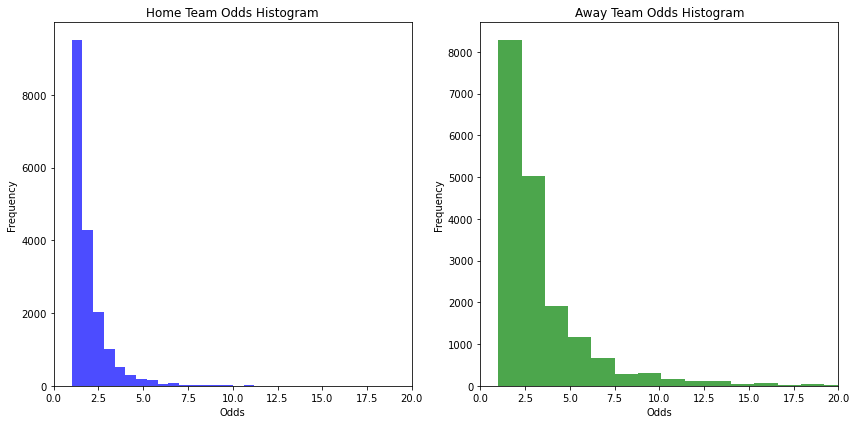

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('DATA/ODDS.csv')

# Extract the 'HOMEML' and 'AWAYML' columns
home_odds = df['HOMEML']
away_odds = df['AWAYML']

# Create a figure and two subplots for home and away odds histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram for home team odds
ax1.hist(home_odds, bins=50, color='blue', alpha=0.7)
ax1.set_title('Home Team Odds Histogram')
ax1.set_xlabel('Odds')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 20)  # Set the x-axis limit to 0 to 15

# Plot the histogram for away team odds
ax2.hist(away_odds, bins=50, color='green', alpha=0.7)
ax2.set_title('Away Team Odds Histogram')
ax2.set_xlabel('Odds')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0, 20)  # Set the x-axis limit to 0 to 15

# Adjust layout and display the histograms
plt.tight_layout()
plt.show()


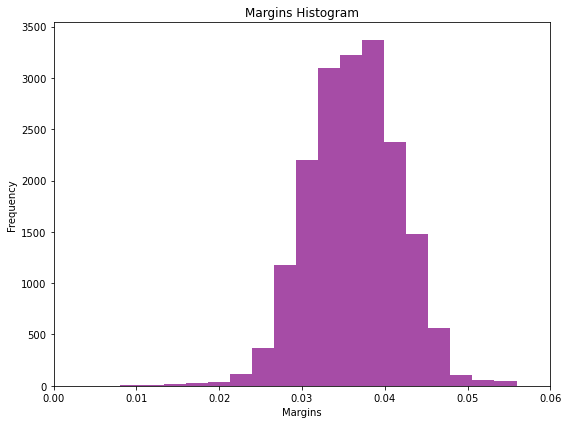

In [17]:
# Calculate the margins using the formula
margins = ((1 / home_odds) + (1 / away_odds) - 1) / ((1 / home_odds) + (1 / away_odds))

# Create a histogram for the margins
plt.figure(figsize=(8, 6))
plt.xlim(-.2, 0.2)
plt.hist(margins, bins=500, color='purple', alpha=0.7)
plt.title('Margins Histogram')
plt.xlabel('Margins')
plt.ylabel('Frequency')
plt.xlim(0, 0.06)

# Adjust layout and display the histogram
plt.tight_layout()
plt.show()


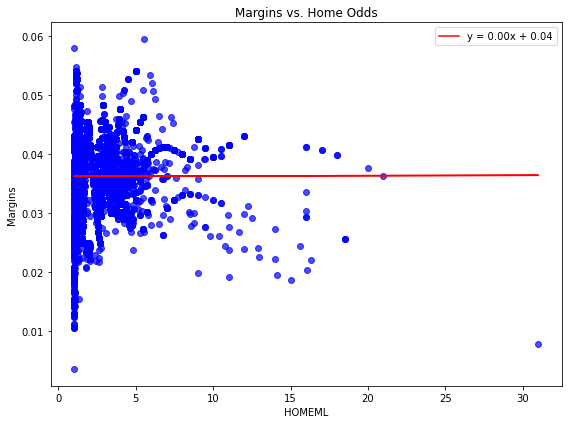

In [36]:
df.dropna(subset=['HOMEML', 'AWAYML'], inplace=True)

# Extract the 'HOMEML' and 'AWAYML' columns
home_odds = df['HOMEML'].values  # Convert to a NumPy array
away_odds = df['AWAYML'].values  # Convert to a NumPy array

# Calculate the margins using the formula
margins = ((1 / home_odds) + (1 / away_odds) - 1) / ((1 / home_odds) + (1 / away_odds))

# Filter out margin values between 0 and 0.2
filtered_data = df[(margins >= 0) & (margins <= 0.2)]
filtered_home_odds = filtered_data['HOMEML'].values  # Convert to a NumPy array
filtered_margins = margins[(margins >= 0) & (margins <= 0.2)]

# Create a scatter plot of margins vs. HOMEML for the filtered data
plt.figure(figsize=(8, 6))
plt.scatter(filtered_home_odds, filtered_margins, color='blue', alpha=0.7)
plt.title('Margins vs. Home Odds')
plt.xlabel('HOMEML')
plt.ylabel('Margins')

# Calculate the line of best fit for the filtered data
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_home_odds, filtered_margins)

# Create the line equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

# Plot the line using abline
abline_values = [(slope * x + intercept) for x in filtered_home_odds]
plt.plot(filtered_home_odds, abline_values, color='red', label=line_eq)

# Display the legend
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


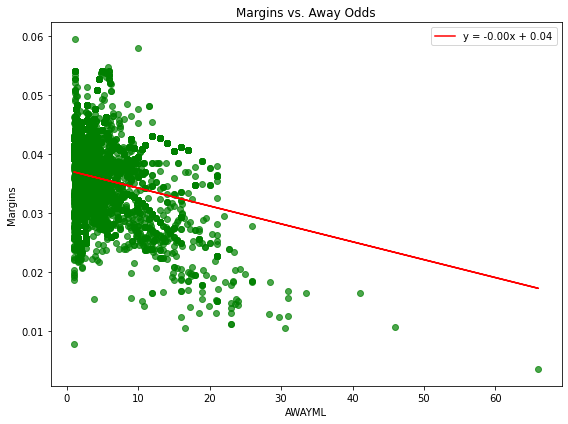

In [31]:
# Filter out margin values between 0 and 0.2
filtered_data = df[(margins >= 0) & (margins <= 0.2)]
filtered_away_odds = filtered_data['AWAYML'].values
filtered_margins = margins[(margins >= 0) & (margins <= 0.2)]

# Create a scatter plot of margins vs. AWAYML for the filtered data
plt.figure(figsize=(8, 6))
plt.scatter(filtered_away_odds, filtered_margins, color='green', alpha=0.7)
plt.title('Margins vs. Away Odds')
plt.xlabel('AWAYML')
plt.ylabel('Margins')

# Calculate the line of best fit for the filtered data
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_away_odds, filtered_margins)

# Create the line equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

# Plot the line using abline
abline_values = [(slope * x + intercept) for x in filtered_away_odds]
plt.plot(filtered_away_odds, abline_values, color='red', label=line_eq)

# Display the legend
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [40]:
df = pd.read_csv('DATA/GAME.csv')
# Calculate how often the home team wins
home_team_wins = (df['WL_HOME'] == 'W').sum()
total_games = df.shape[0]
home_win_percentage = (home_team_wins / total_games) * 100

# Calculate how often the away team wins
away_team_wins = (df['WL_HOME'] == 'L').sum()
away_win_percentage = (away_team_wins / total_games) * 100

print(f"Home Team Wins: {home_win_percentage:.2f}%")
print(f"Away Team Wins: {away_win_percentage:.2f}%")

Home Team Wins: 62.40%
Away Team Wins: 37.60%


In [43]:
# Load the CSV file into a DataFrame
df = pd.read_csv('DATA/ODDS.csv')

total_games = df.shape[0]

# Determine which team is the favorite and underdog based on odds
df['Favorite'] = 'HOME'  # Initialize all as favorites
df.loc[df['HOMEML'] > df['AWAYML'], 'Favorite'] = 'AWAY'  # Change to AWAY if AWAYML is lower

# Calculate how often the favorite wins
favorite_wins = ((df['Favorite'] == 'HOME') & (df['WL_HOME'] == 'W')).sum() + ((df['Favorite'] == 'AWAY') & (df['WL_HOME'] == 'L')).sum()
favorite_win_percentage = (favorite_wins / total_games) * 100

# Calculate how often the underdog wins
underdog_wins = ((df['Favorite'] == 'AWAY') & (df['WL_HOME'] == 'W')).sum() +((df['Favorite'] == 'HOME') & (df['WL_HOME'] == 'L')).sum()
underdog_win_percentage = (underdog_wins / total_games) * 100

# Display the results
print(f"Favorite Wins: {favorite_win_percentage:.2f}%")
print(f"Underdog Wins: {underdog_win_percentage:.2f}%")


Favorite Wins: 68.48%
Underdog Wins: 31.47%


In [45]:
# Determine which team is the favorite based on odds
df['Favorite'] = 'HOME'  # Initialize all as favorites
df.loc[df['HOMEML'] > df['AWAYML'], 'Favorite'] = 'AWAY'  # Change to AWAY if AWAYML is lower

# Calculate how often the home team is the favorite
home_team_favorite_count = (df['Favorite'] == 'HOME').sum()
total_games = df.shape[0]
home_team_favorite_percentage = (home_team_favorite_count / total_games) * 100

# Calculate how often the away team is the favorite
away_team_favorite_count = (df['Favorite'] == 'AWAY').sum()
away_team_favorite_percentage = (away_team_favorite_count / total_games) * 100

# Display the results
print(f"Home Team is the Favorite: {home_team_favorite_percentage:.2f}%")
print(f"Away Team is the Favorite: {away_team_favorite_percentage:.2f}%")


Home Team is the Favorite: 67.35%
Away Team is the Favorite: 32.65%
